In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df=pd.read_csv("xAPI-Edu-Data.csv")

In [3]:
df.shape

(480, 17)

In [4]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
73,F,KW,KuwaIT,MiddleSchool,G-07,A,English,F,Father,19,30,26,19,Yes,Bad,Above-7,M
376,M,Jordan,Jordan,lowerlevel,G-02,B,Arabic,F,Mum,20,90,50,61,Yes,Bad,Above-7,M
78,M,KW,KuwaIT,HighSchool,G-11,A,Quran,F,Father,13,3,11,9,No,Bad,Above-7,L
303,F,Jordan,Jordan,lowerlevel,G-04,B,Science,S,Mum,12,44,25,39,No,Bad,Under-7,M
302,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Mum,11,20,21,23,No,Bad,Under-7,M
289,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,75,71,76,80,Yes,Good,Under-7,M
451,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,19,98,20,2,Yes,Good,Under-7,H
348,M,Lybia,Lybia,lowerlevel,G-02,B,French,F,Mum,20,3,9,3,No,Good,Above-7,L
274,F,lebanon,lebanon,MiddleSchool,G-06,A,English,F,Mum,95,82,82,70,Yes,Good,Under-7,H
382,M,Iraq,Iraq,lowerlevel,G-02,B,Arabic,F,Mum,69,82,20,28,Yes,Good,Under-7,H


In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [8]:
df.fillna(df.mean(), inplace= True)

### 1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

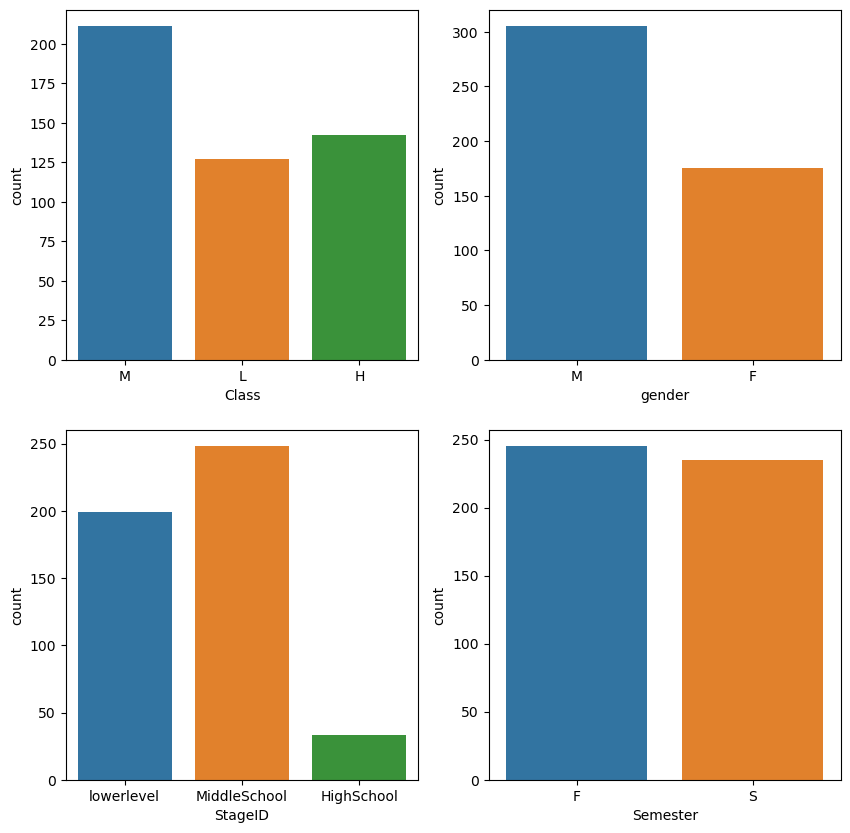

In [12]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=df, ax=axarr[0,0])
sns.countplot(x='gender', data=df, ax=axarr[0,1])
sns.countplot(x='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', data=df, ax=axarr[1,1])

plt.show()

<Axes: xlabel='NationalITy', ylabel='count'>

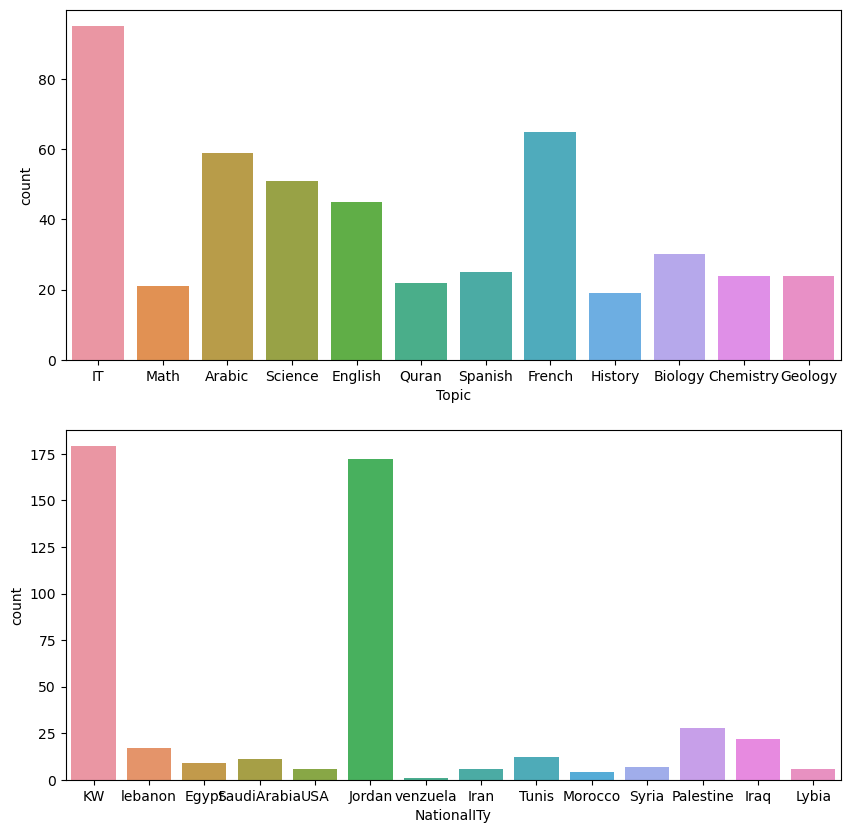

In [13]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=df, ax=axis1)
sns.countplot(x='NationalITy', data=df, ax=axis2)

### 2. Look at some categorical features in relation to each other, to see what insights could be possibly read?

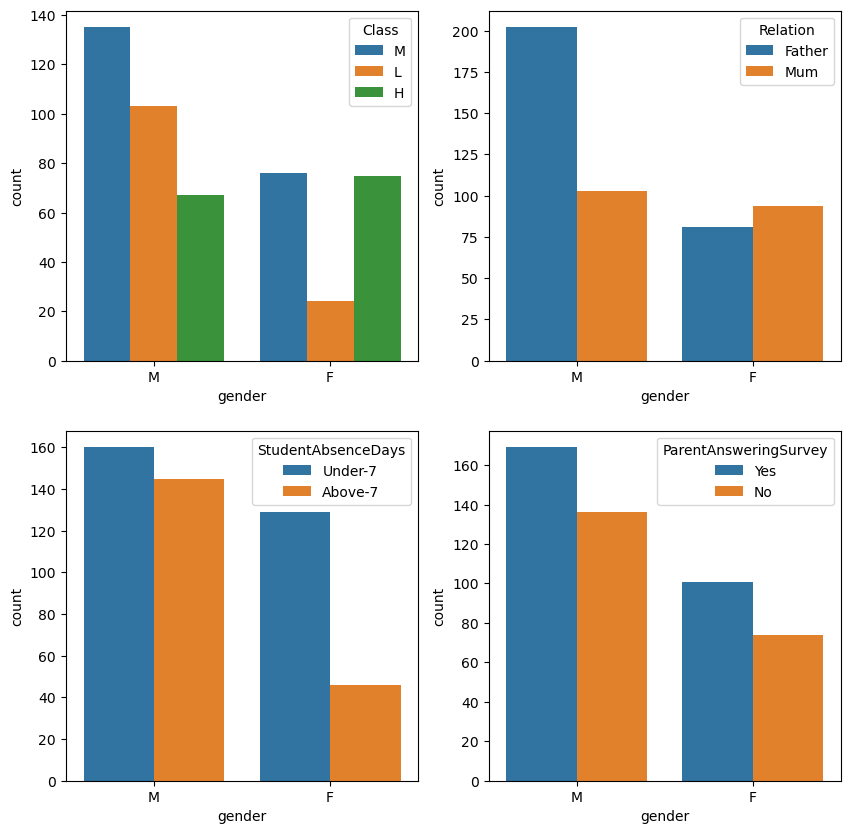

In [15]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=df, ax=axarr[0,0])
sns.countplot(x='gender', hue='Relation', data=df, ax=axarr[0,1])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, ax=axarr[1,0])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, ax=axarr[1,1])

plt.show()

<Axes: xlabel='NationalITy', ylabel='count'>

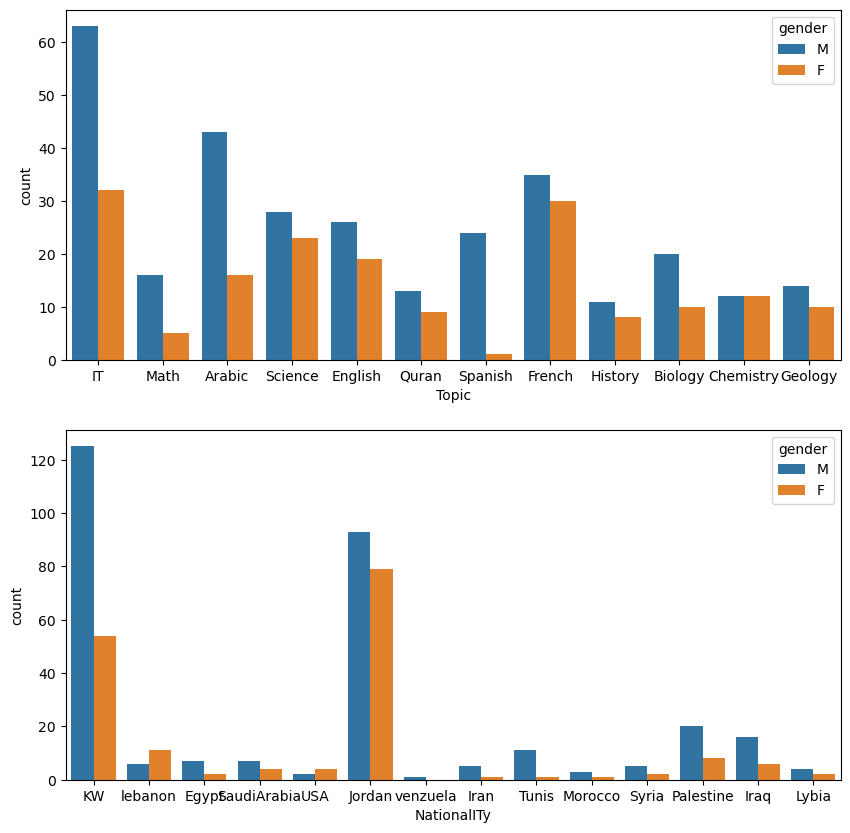

In [18]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)

Ans :

Girls seem to have performed better than boys
In the case of girls, mothers seem to be more interested in their education than fathers
Girls had much better attendance than boys
No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
Gender disparity holds even at a country level. May just be as a result of the sampling

### 3. Visualize categorical variables with numerical variables and give conclusions?

In [19]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

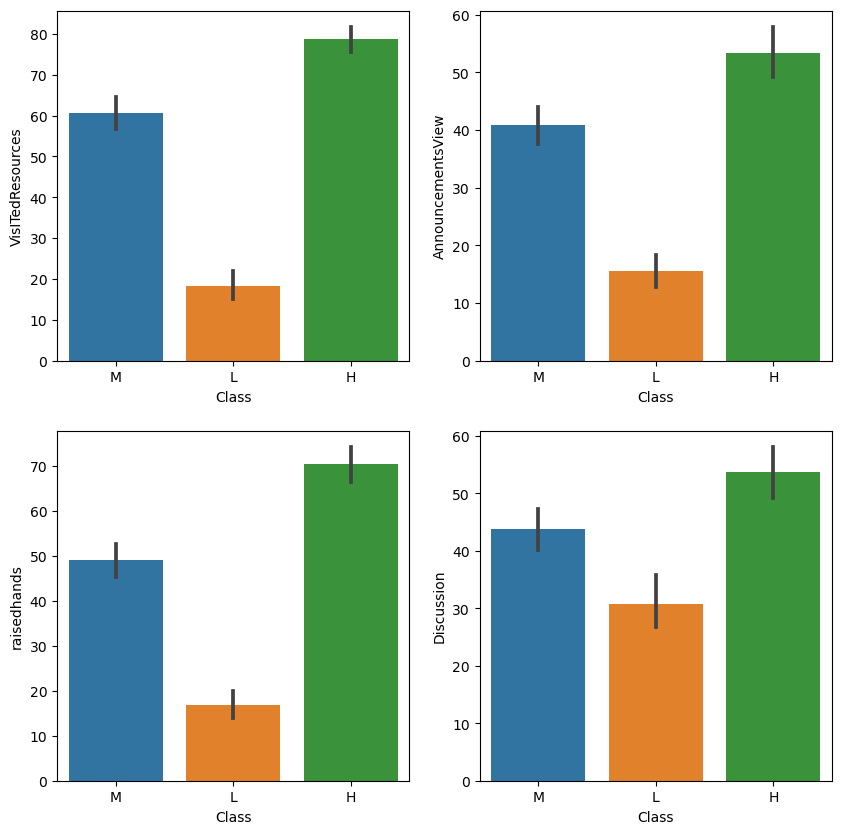

In [20]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, ax=axarr[1,1])

plt.show()

### 4. From the above result, what are the factors that leads to get low grades of the students?

In [24]:
ave_raisedhands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
unsuccess = df.loc[(df['raisedhands'] >= ave_raisedhands) & (df['VisITedResources']>=ave_VisITedResources) & (df['AnnouncementsView']>=ave_AnnouncementsView)  & (df['Class'] == 'L')]
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [27]:
df['numeric_class'] = [1 if df.loc[i,'Class'] == 'L' else 2 if df.loc[i,'Class'] == 'M' else 3 for i in range(len(df))]

In [28]:
grade_male_ave = sum(df[df.gender == 'M'].numeric_class)/float(len(df[df.gender == 'M']))
grade_female_ave = sum(df[df.gender == 'F'].numeric_class)/float(len(df[df.gender == 'F']))


Could not get explaination for low grades, with comparison of gender

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

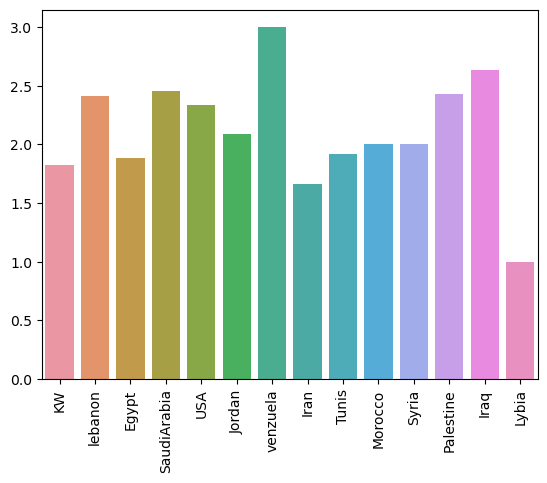

In [29]:
nation = df.NationalITy.unique()
nation_grades_ave = [sum(df[df.NationalITy == i].numeric_class)/float(len(df[df.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(df[df.NationalITy == 'Jordan'].numeric_class)/float(len(df[df.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

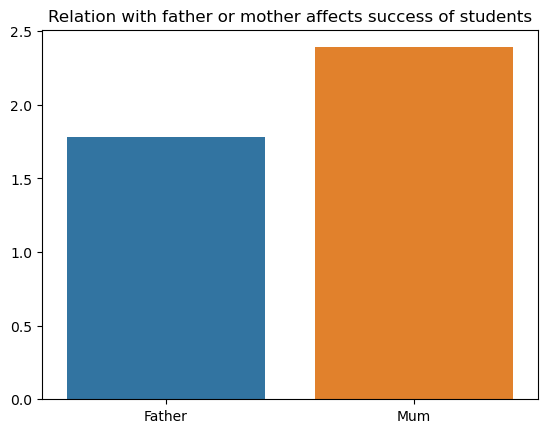

In [30]:
relation = df.Relation.unique()
relation_grade_ave = [sum(df[df.Relation == i].numeric_class)/float(len(df[df.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

Text(0.5, 1.0, 'Absence effect on success')

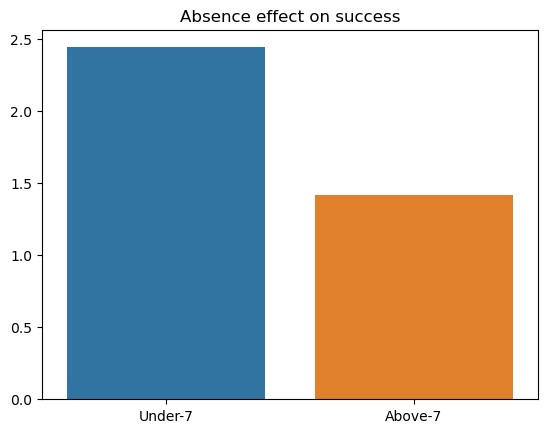

In [31]:
absence_day = df.StudentAbsenceDays.unique()
absense_day_ave = [sum(df[df.StudentAbsenceDays == i].numeric_class)/float(len(df[df.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')

Ans :

These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades
Their absence days are above seven which resulted in low grades

### 5. Build classification model and present it's classification report ?

In [33]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [34]:
data1 = df.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [35]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)

StandardScaler()

In [38]:
X = scaler.fit_transform(Features)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)


In [40]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [41]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [42]:
Prediction

array([2, 2, 3, 1, 1, 1, 1, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 3, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 2, 1, 1, 1, 3, 2, 2, 1, 2, 2], dtype=int64)

In [43]:
Score

0.7361111111111112

In [44]:
print(Report)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

